In [1]:
from sklearn.datasets import load_diabetes # (1)
import numpy as np # (2,3)
from sklearn.model_selection import train_test_split # (4)

    (1) 데이터 가져오기

In [2]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df_x = diabetes.data
df_y = diabetes.target

print(df_x.shape)
print(df_y.shape)

(442, 10)
(442,)


In [3]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

    (2) 모델에 입력할 데이터 x 준비하기

In [4]:
df_x = np.array(df_x)

    (3) 모델에 입력할 데이터 y 준비하기

In [5]:
df_y = np.array(df_y)

    (4) train 데이터와 test 데이터로 분리하기
   

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    df_x, df_y, test_size=0.2, random_state=42)

    (5) 모델 준비하기

In [7]:
W = np.random.rand(10)
b = np.random.rand()

print(W)
print(b)

[0.70305618 0.5865637  0.19969293 0.57977508 0.74432911 0.25607774
 0.02263739 0.58916902 0.28506263 0.43842315]
0.8722084465935375


In [8]:
def model(X,W,b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

    (6) 손실함수 loss 정의하기

In [9]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

def loss(x, w, b, y):
    predictions = model(x, w, b)
    L = MSE(predictions, y)
    return L

    (7) 기울기를 구하는 gradient 함수 구현하기

In [10]:
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db



In [11]:
dW,db=gradient(df_x,W,b,df_y)
print(dW)
print(db)

[-1.36909093 -0.30979841 -4.28976741 -3.22644005 -1.54423599 -1.26633988
  2.88703682 -3.14393148 -4.13680015 -2.79392431]
-302.5225514326048


    (8) 하이퍼 파라미터인 학습률 설정하기

In [12]:
LEARNING_RATE = 0.1

    (9) 모델 학습하기

In [13]:
losses = []

for i in range(1, 3001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))


Iteration 10 : Loss 6253.8539
Iteration 20 : Loss 5911.5839
Iteration 30 : Loss 5834.9261
Iteration 40 : Loss 5763.5842
Iteration 50 : Loss 5694.4808
Iteration 60 : Loss 5627.5066
Iteration 70 : Loss 5562.5892
Iteration 80 : Loss 5499.6588
Iteration 90 : Loss 5438.6485
Iteration 100 : Loss 5379.4932
Iteration 110 : Loss 5322.1305
Iteration 120 : Loss 5266.5000
Iteration 130 : Loss 5212.5434
Iteration 140 : Loss 5160.2045
Iteration 150 : Loss 5109.4289
Iteration 160 : Loss 5060.1644
Iteration 170 : Loss 5012.3603
Iteration 180 : Loss 4965.9678
Iteration 190 : Loss 4920.9399
Iteration 200 : Loss 4877.2310
Iteration 210 : Loss 4834.7972
Iteration 220 : Loss 4793.5963
Iteration 230 : Loss 4753.5872
Iteration 240 : Loss 4714.7305
Iteration 250 : Loss 4676.9882
Iteration 260 : Loss 4640.3234
Iteration 270 : Loss 4604.7006
Iteration 280 : Loss 4570.0855
Iteration 290 : Loss 4536.4451
Iteration 300 : Loss 4503.7473
Iteration 310 : Loss 4471.9614
Iteration 320 : Loss 4441.0576
Iteration 330 : L

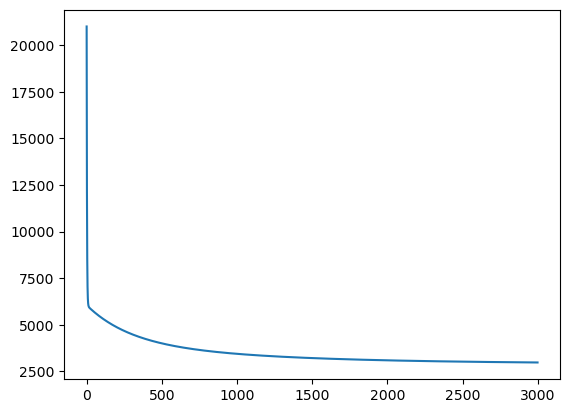

In [14]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

    (10) test 데이터에 대한 성능 확인하기

In [15]:
predictions = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2870.533631108969

    (11) 정답 데이터와 예측한 데이터 시각화하기

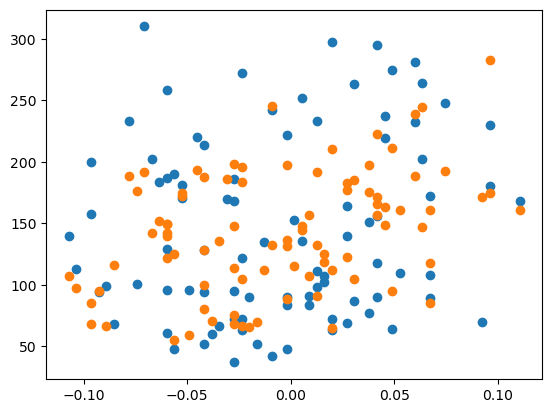

In [16]:
plt.scatter(X_test[:,0],y_test)
plt.scatter(X_test[:,0],predictions)
plt.show()